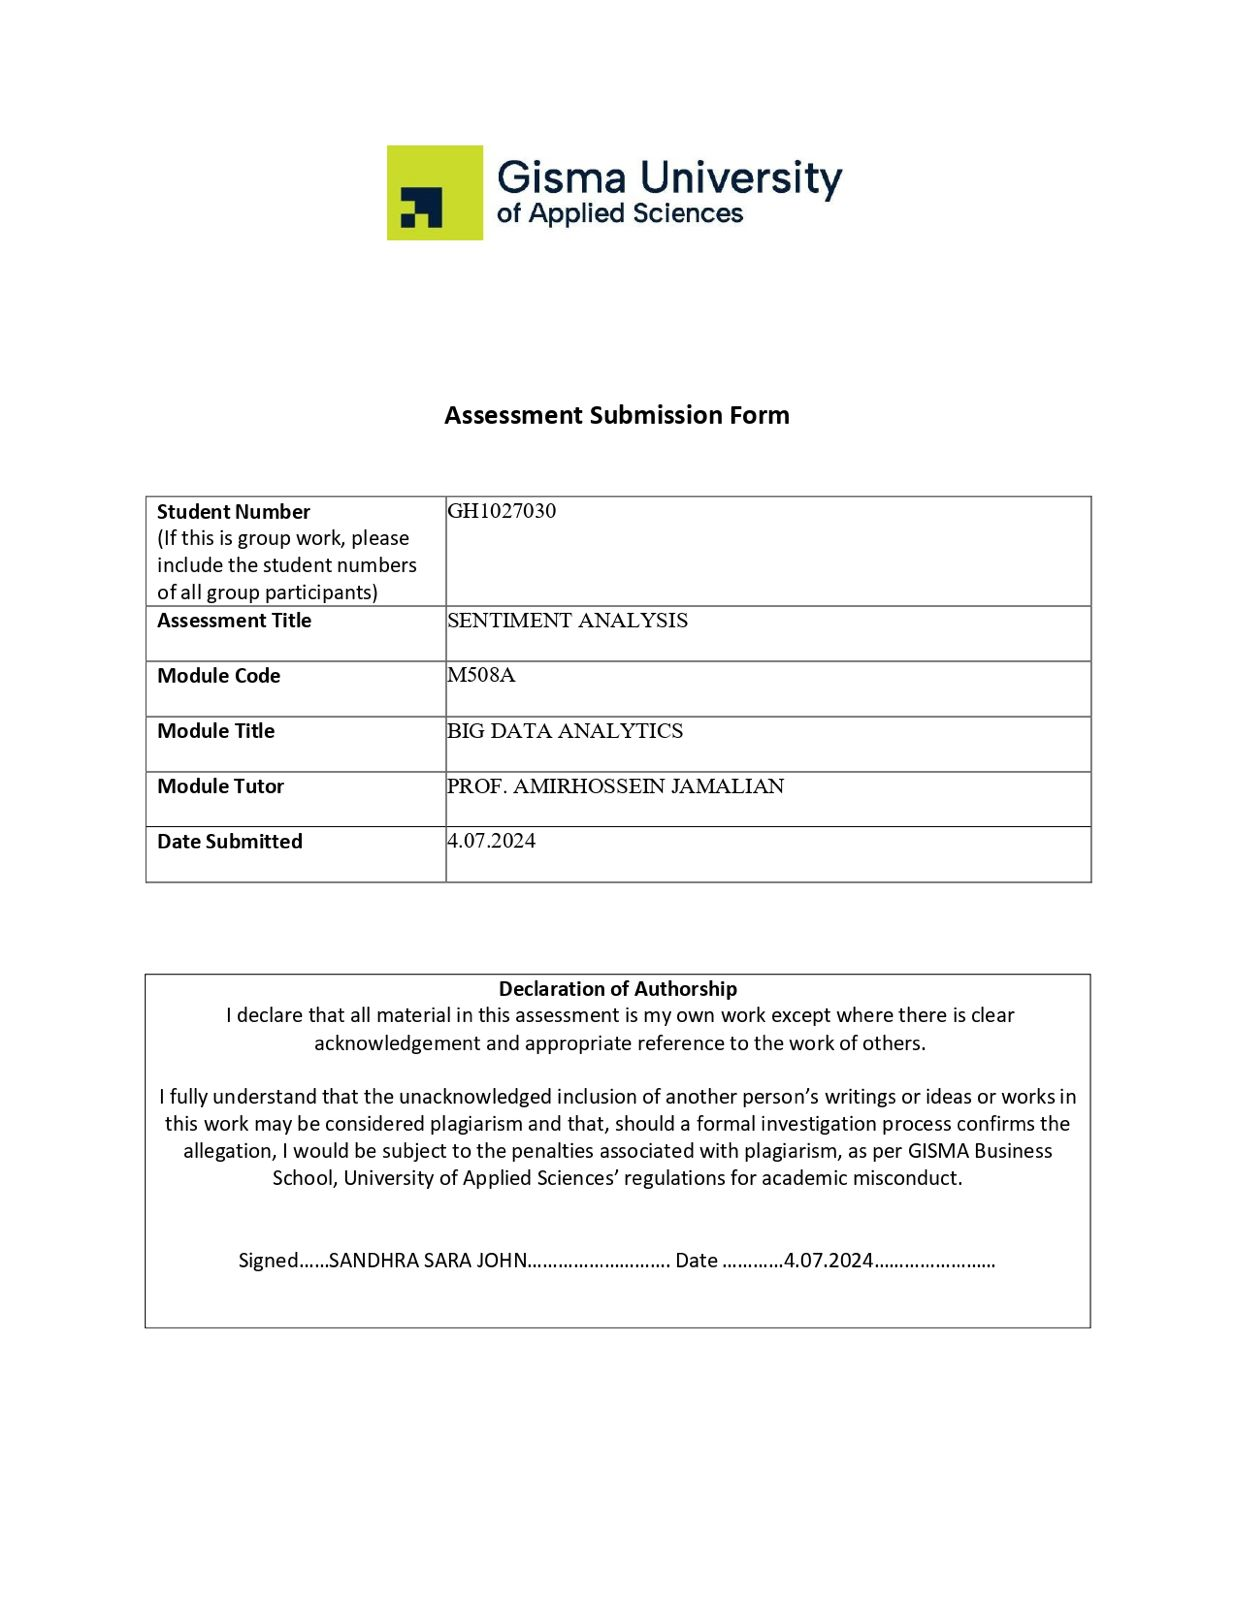

# Final Assesment - M508A Big Data Analytics

## 1. Business Problem Understanding
**Problem Statement**

Usually airways in general fail to give attention in identifying the strengths and areas of improvement therefore to make it easy and to meet the customers satisfaction it is necessary to understand about what the customers think about the airway. This can help the company to maintain the competitiveness in the industry.

**Machine Learning Task**

Sentiment analysis about the customers of Qatar Airways.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

## 2. Data Collection

In [ ]:
df = pd.read_csv("/content/qatar_airways_reviews.csv")
df.head(3)

,Id,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,3/2/2024,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,3/2/2024,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,24-Mar,no,NaN,0.0
1,1,2/29/2024,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2/29/2024,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,24-Feb,no,NaN,1.0
2,2,2/29/2024,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2/29/2024,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,23-Nov,no,A380,1.0


I have collected the data from kaggle about the reviews about the Qatar Airways. It contains ratings ("Rating") of the customers as well as comments ("Title") which will be the main columns.


## 3. Data Exploration and Data Preprocessing

I have done exploration and preprocessing together as to get accurate graph.

In [ ]:
df.shape

(2369, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2369 non-null   int64  
 1   Date Published     2369 non-null   object 
 2   Rating             2368 non-null   float64
 3   Max Rating         2368 non-null   float64
 4   Title              2369 non-null   object 
 5   Author             2369 non-null   object 
 6   Country            2369 non-null   object 
 7   Date               2369 non-null   object 
 8   Review Body        2369 non-null   object 
 9   Type Of Traveller  1934 non-null   object 
 10  Seat Type          2369 non-null   object 
 11  Route              1931 non-null   object 
 12  Date Flown         1925 non-null   object 
 13  Recommended        588 non-null    object 
 14  Aircraft           1281 non-null   object 
 15  Verified           1252 non-null   float64
dtypes: float64(3), int64(1),

In [ ]:
df.describe()

,Id,Rating,Max Rating,Verified
count,2369.000000,2368.000000,2368.0,1252.000000
mean,1184.000000,7.311233,10.0,0.920128
std,684.015716,2.861367,0.0,0.271204
min,0.000000,1.000000,10.0,0.000000
25%,592.000000,5.000000,10.0,1.000000
50%,1184.000000,8.000000,10.0,1.000000
75%,1776.000000,10.000000,10.0,1.000000
max,2368.000000,10.000000,10.0,1.000000


In [ ]:
df.isna().sum()

Id                      0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64

#### **Clearing the null values**

The "Rating" null is dropped as there is no numerical rating as its only showing NaN.

In [ ]:
print(df[df["Rating"].isna()])
df.drop(df[df["Rating"].isna()].index, inplace=True)

        Id Date Published  Rating  Max Rating  \
1308  1308      9/16/2017     NaN         NaN   

                                      Title      Author         Country  \
1308  "fabulous service from Qatar Airways"  R Kirchner  United Kingdom   

           Date                                        Review Body  \
1308  9/16/2017  ✅ Verified Review |  Munich to Doha onboard a ...   

     Type Of Traveller      Seat Type           Route Date Flown Recommended  \
1308      Solo Leisure  Economy Class  Munich to Doha     17-Sep         NaN   

     Aircraft  Verified  
1308     A350       NaN  


The columns "Verified" and "Aircraft" columns are deleted due to nulls because the "Verified" is in the form of 1s and 0s and the "Aircraft" column no all of the travellers specified.

In [ ]:
del df["Verified"]
del df["Aircraft"]

Deleting the "Recommended" column as most of them are no.

In [ ]:
print(df["Recommended"].value_counts().sort_index())
del df["Recommended"]

Recommended
no    588
Name: count, dtype: int64


Dropping the "Date flown", "Route", "Max Rating" columns as they are not applicable and the maximum rating is out of 10.

In [ ]:
del df["Date Flown"]
del df["Route"]
del df["Type Of Traveller"]
del df["Max Rating"]

In [ ]:
df.head(3)

,Id,Date Published,Rating,Title,Author,Country,Date,Review Body,Seat Type
0,0,3/2/2024,1.0,“marred by inconveniences”,Mary Le,United Kingdom,3/2/2024,The delay of my flight from Haneda to Doha ca...,Economy Class
1,1,2/29/2024,1.0,"""seat wouldn't stay up""",Brian English,Canada,2/29/2024,They convinced me that I needed to pay $1500...,Business Class
2,2,2/29/2024,1.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2/29/2024,I have sent 5 emails and have only received ...,Economy Class


<Axes: title={'center': 'Counts of reviews'}, xlabel='Rating'>

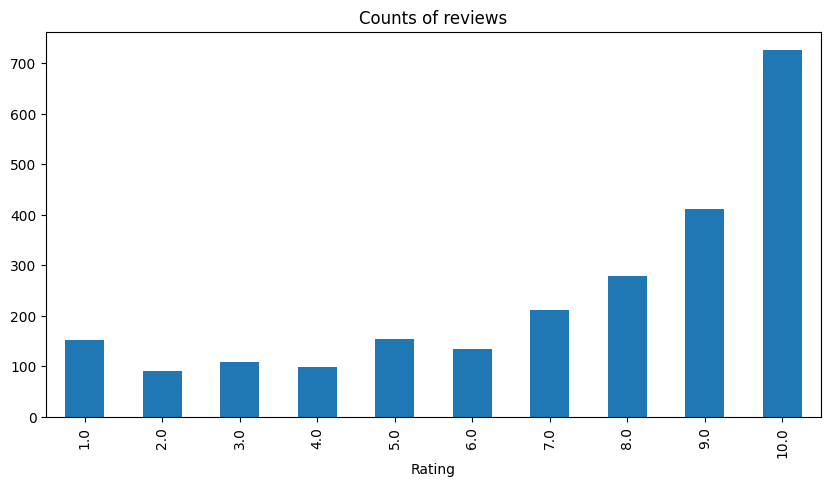

In [ ]:
df["Rating"].value_counts().sort_index().plot(kind="bar", title="Counts of reviews" , figsize=(10,5))

After exploration and cleaning all the nulls with the accurate "Rating" a graph is created. The above graph is to show the ratings given by the people. As we can see most of the passsengers rated 10.

This shows that most of the customers are happy about the services of the Airway.

## 3. Feature Engineering

#### Sentiment score and metadata

In [ ]:
def preprocessor(text):
    text = text.lower()
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(text)
    porter_stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_words = [porter_stemmer.stem(w) for w in words]
    return " ".join(stemmed_words)


df["PreProcessed Data"] = df["Review Body"].apply(preprocessor)
df.head()

,Id,Date Published,Rating,Title,Author,Country,Date,Review Body,Seat Type,PreProcessed Data
0,0,3/2/2024,1.0,“marred by inconveniences”,Mary Le,United Kingdom,3/2/2024,The delay of my flight from Haneda to Doha ca...,Economy Class,the delay of my flight from haneda to doha cau...
1,1,2/29/2024,1.0,"""seat wouldn't stay up""",Brian English,Canada,2/29/2024,They convinced me that I needed to pay $1500...,Business Class,they convinc me that i need to pay 1500 to add...
2,2,2/29/2024,1.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2/29/2024,I have sent 5 emails and have only received ...,Economy Class,i have sent 5 email and have onli receiv 2 aut...
3,3,2/25/2024,10.0,"""no attempt to address our complaint""",Alwaleed Althani,Qatar,2/25/2024,We flew on probably the first A380 the airlin...,First Class,we flew on probabl the first a380 the airlin r...
4,4,2/22/2024,7.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2/22/2024,"Service was ok, pretty good on my aisle and ...",Business Class,servic wa ok pretti good on my aisl and extrem...


In [ ]:
a = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment_scores(text):
    return a.polarity_scores(text)

In [ ]:
df['Score'] = df['PreProcessed Data'].apply(get_sentiment_scores)

In [ ]:
df['Compound Score'] = df['Score'].apply(lambda x: x['compound'])
df['Positive_Score'] = df['Score'].apply(lambda x: x['pos'])
df['Negative_Score'] = df['Score'].apply(lambda x: x['neg'])
df['Neutral_Score'] = df['Score'].apply(lambda x: x['neu'])

In [ ]:
df.head()

,Id,Date Published,Rating,Title,Author,Country,Date,Review Body,Seat Type,PreProcessed Data,Score,Compound Score,Positive_Score,Negative_Score,Neutral_Score
0,0,3/2/2024,1.0,“marred by inconveniences”,Mary Le,United Kingdom,3/2/2024,The delay of my flight from Haneda to Doha ca...,Economy Class,the delay of my flight from haneda to doha cau...,"{'neg': 0.053, 'neu': 0.893, 'pos': 0.054, 'co...",0.3071,0.054,0.053,0.893
1,1,2/29/2024,1.0,"""seat wouldn't stay up""",Brian English,Canada,2/29/2024,They convinced me that I needed to pay $1500...,Business Class,they convinc me that i need to pay 1500 to add...,"{'neg': 0.016, 'neu': 0.961, 'pos': 0.022, 'co...",0.1280,0.022,0.016,0.961
2,2,2/29/2024,1.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2/29/2024,I have sent 5 emails and have only received ...,Economy Class,i have sent 5 email and have onli receiv 2 aut...,"{'neg': 0.088, 'neu': 0.894, 'pos': 0.018, 'co...",-0.9919,0.018,0.088,0.894
3,3,2/25/2024,10.0,"""no attempt to address our complaint""",Alwaleed Althani,Qatar,2/25/2024,We flew on probably the first A380 the airlin...,First Class,we flew on probabl the first a380 the airlin r...,"{'neg': 0.05, 'neu': 0.641, 'pos': 0.309, 'com...",0.9769,0.309,0.050,0.641
4,4,2/22/2024,7.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2/22/2024,"Service was ok, pretty good on my aisle and ...",Business Class,servic wa ok pretti good on my aisl and extrem...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.5423,0.070,0.000,0.930


In [ ]:
df['Sentiment'] = df['Compound Score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

In [ ]:
df.head()

,Id,Date Published,Rating,Title,Author,Country,Date,Review Body,Seat Type,PreProcessed Data,Score,Compound Score,Positive_Score,Negative_Score,Neutral_Score,Sentiment
0,0,3/2/2024,1.0,“marred by inconveniences”,Mary Le,United Kingdom,3/2/2024,The delay of my flight from Haneda to Doha ca...,Economy Class,the delay of my flight from haneda to doha cau...,"{'neg': 0.053, 'neu': 0.893, 'pos': 0.054, 'co...",0.3071,0.054,0.053,0.893,positive
1,1,2/29/2024,1.0,"""seat wouldn't stay up""",Brian English,Canada,2/29/2024,They convinced me that I needed to pay $1500...,Business Class,they convinc me that i need to pay 1500 to add...,"{'neg': 0.016, 'neu': 0.961, 'pos': 0.022, 'co...",0.1280,0.022,0.016,0.961,positive
2,2,2/29/2024,1.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2/29/2024,I have sent 5 emails and have only received ...,Economy Class,i have sent 5 email and have onli receiv 2 aut...,"{'neg': 0.088, 'neu': 0.894, 'pos': 0.018, 'co...",-0.9919,0.018,0.088,0.894,negative
3,3,2/25/2024,10.0,"""no attempt to address our complaint""",Alwaleed Althani,Qatar,2/25/2024,We flew on probably the first A380 the airlin...,First Class,we flew on probabl the first a380 the airlin r...,"{'neg': 0.05, 'neu': 0.641, 'pos': 0.309, 'com...",0.9769,0.309,0.050,0.641,positive
4,4,2/22/2024,7.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2/22/2024,"Service was ok, pretty good on my aisle and ...",Business Class,servic wa ok pretti good on my aisl and extrem...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.5423,0.070,0.000,0.930,positive


The SentimentIntensityAnalyzer method is used to calculate the sentiment score of each review. To understand whether the reviews are Positive, Negative or Neutral according to the sentence structure.

<Axes: xlabel='Rating', ylabel='Compound Score'>

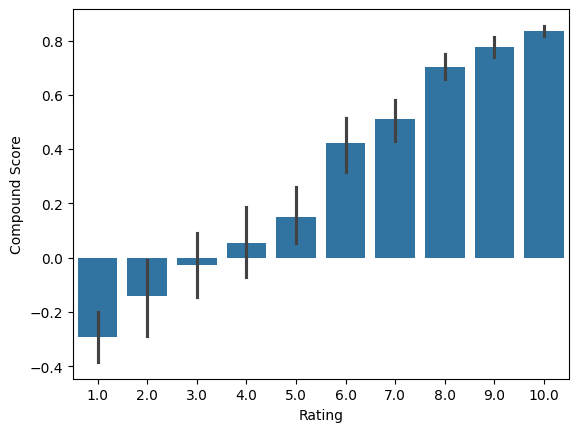

In [ ]:
sns.barplot(df, x="Rating", y="Compound Score")

The above graph shows the relationship between the ratings given by the people and the computed compound value according to their reviews. It shows that
as the compound gets positive the rating increases.

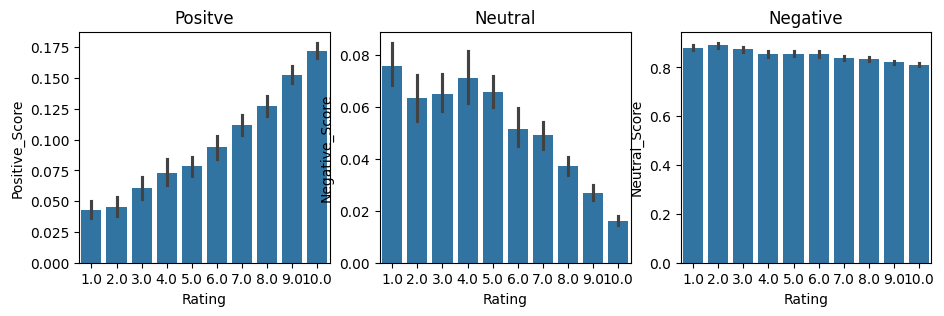

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (11,3))
sns.barplot(df, x="Rating", y="Positive_Score", ax=axs[0])
sns.barplot(df, x="Rating", y="Negative_Score", ax=axs[1])
sns.barplot(df, x="Rating", y="Neutral_Score", ax=axs[2])
axs[0].set_title("Positve")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

The above graphs are for each sentiment. As we can see the positivity increases as the rating increases, Neutral stays the same levels and Negativity decreases as the ratings become higher.

I have added sentiment column to show whether each review or row is positive, negative or neutral.

## 4. Model Training

Here, I am going to train the models- Logistic Regression and Naive Bayes and select the best model which has high accuracy.

In [ ]:
vectorizer_data = TfidfVectorizer()
X = vectorizer_data.fit_transform(df['PreProcessed Data'])
y = df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pr = lg.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pr))
print("Logistic Regression Report:", classification_report(y_test, pr))
print("Logistic Regression Confusion Matrix:", confusion_matrix(y_test, pr))

Logistic Regression Accuracy: 0.8382559774964838
Logistic Regression Report:               precision    recall  f1-score   support

    negative       0.75      0.34      0.47       138
     neutral       0.00      0.00      0.00         9
    positive       0.85      0.97      0.91       564

    accuracy                           0.84       711
   macro avg       0.53      0.44      0.46       711
weighted avg       0.82      0.84      0.81       711

Logistic Regression Confusion Matrix: [[ 47   0  91]
 [  1   0   8]
 [ 15   0 549]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
pre = nb.predict(X_test)

In [ ]:
print("Multinomial Niave Bayes Accuracy:", accuracy_score(y_test, pre))
print("Multinomial Niave Bayes Report:", classification_report(y_test, pre))
print("Multinomial Niave Bayes Confusion Matrix:", confusion_matrix(y_test, pre))

Multinomial Niave Bayes Accuracy: 0.7932489451476793
Multinomial Niave Bayes Report:               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       138
     neutral       0.00      0.00      0.00         9
    positive       0.79      1.00      0.88       564

    accuracy                           0.79       711
   macro avg       0.26      0.33      0.29       711
weighted avg       0.63      0.79      0.70       711

Multinomial Niave Bayes Confusion Matrix: [[  0   0 138]
 [  0   0   9]
 [  0   0 564]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this the Logistic Regression is more accurate than naive bayes model when we compare the sentiment with the reviews. Logistic Regression with 0.84 accuracy and Naive bayes with 0.79 accuracy.

## Conclusion

The overall pipeline contains sentiment analysis and comparison of two models(Logistic Regression and Nauve Bayes).

**Strengths**

- Able to understand how sentiment analysis can be helpful for the companies/businesses to understand the customer's review about the services.

Therefore, this system can be a help for the Airways to alter to their services and provide much better statisfaction to the passengers and gain demand among the other competitive airways.